*Import* critical modules first

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import datetime

### Getting started
Before executing any analysis in Python, save the file from the K-30 as a .csv file (rather than .txt) and add a header row of *elapsed time (sec),CO2 (ppm)*

In [2]:
# Read in data
df_CO2 = pd.read_csv('2021-03-15_CO2SensorUpload.csv')

# Time when I noted that CO2 logging began *** in UTC ***
# Year, month, day, hour (24 hr format), minute, second
starttime_est = datetime.datetime(2021, 3, 8, 12, 45, 47)
df_CO2.head()

,elapsed time (sec),CO2 (ppm)
0,2,0
1,4,610
2,6,608
3,8,596
4,10,596


In [3]:
df_CO2.describe()

,elapsed time (sec),CO2 (ppm)
count,3101.000000,3101.000000
mean,3214.917768,687.740406
std,1856.480716,158.024237
min,2.000000,0.000000
25%,1608.000000,523.000000
50%,3215.000000,702.000000
75%,4822.000000,847.000000
max,6430.000000,907.000000


In [4]:
# Calculate "absolute" rather than elapsed time for CO2 sensor, in UTC
# time_CO2 = starttime_utc+pd.Timedelta(seconds = elapsed_time_sec)
elapsed_time_sec = df_CO2['elapsed time (sec)']
time_CO2 = [starttime_est+datetime.timedelta(seconds = e_time) for e_time in elapsed_time_sec]
time_CO2 = pd.Series(time_CO2)

In [5]:
# Add newly named and calculated columns to original DataFrame, reset index to time in UTC
df_CO2['Time (UTC)'] = time_CO2
df_CO2.set_index('Time (UTC)', inplace = True, drop = True)
df_CO2['CO2 (ppm)']

Time (UTC)
2021-03-08 12:45:49      0
2021-03-08 12:45:51    610
2021-03-08 12:45:53    608
2021-03-08 12:45:55    596
2021-03-08 12:45:57    596
                      ... 
2021-03-08 14:32:49    482
2021-03-08 14:32:51    482
2021-03-08 14:32:53    482
2021-03-08 14:32:55    482
2021-03-08 14:32:57    481
Name: CO2 (ppm), Length: 3101, dtype: int64

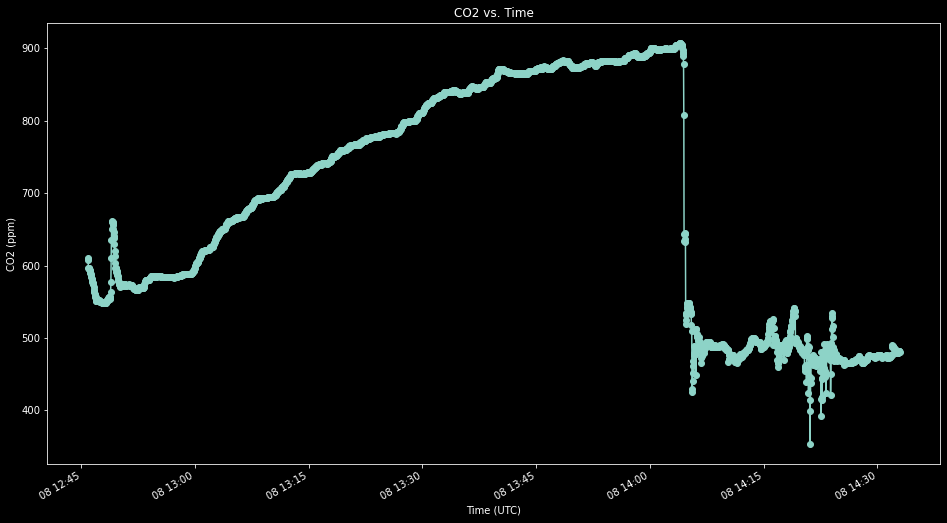

In [6]:
#%% Plot current data
plt.style.use('dark_background')

fig, axs = plt.subplots(figsize = (16, 9))
axs.plot(df_CO2.index[1:], df_CO2['CO2 (ppm)'][1:], 'o-')
axs.set_xlabel('Time (UTC)')
axs.set_ylabel('CO2 (ppm)')
axs.set_title('CO2 vs. Time')
fig.autofmt_xdate()
plt.savefig('k30plot.png', dpi = 300)

Take a closer look at data from 2 pm onward, when natural variability of the outdoor environment would be dominant signal

In [7]:
CO2_outside = df_CO2['CO2 (ppm)'][2500:]

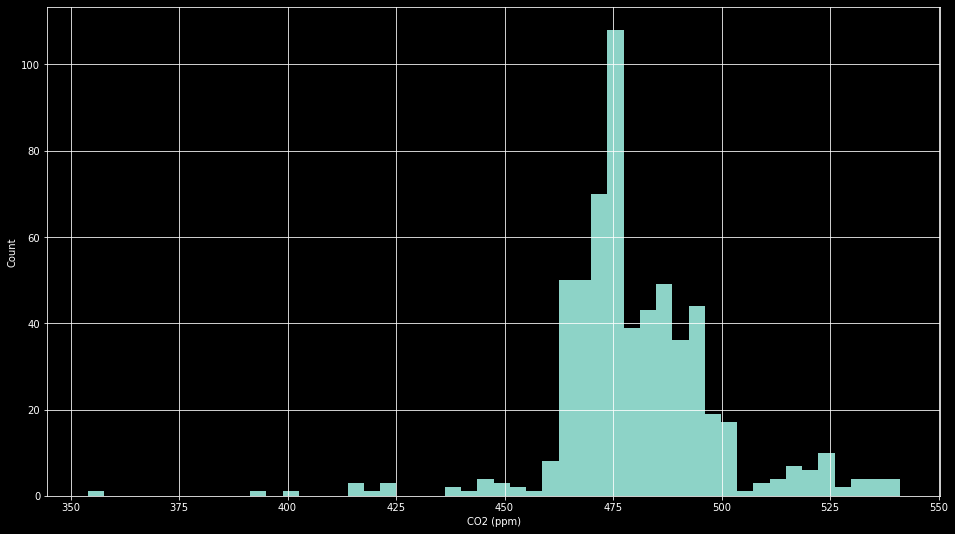

In [8]:
fig, axs = plt.subplots(figsize = (16, 9))
CO2_outside.hist(bins = 50)
axs.set_ylabel('Count')
axs.set_xlabel('CO2 (ppm)')
plt.savefig('k30_hist.png', dpi = 300)

In [9]:
CO2_outside_stdev = np.nanstd(CO2_outside)
CO2_outside_stdev

19.038458304731517

In [10]:
CO2_outside_mean = np.nanmean(CO2_outside)
CO2_outside_mean

480.4908485856905

In [11]:
within_2_stdevs = (CO2_outside < CO2_outside_mean+2*CO2_outside_stdev) & (CO2_outside > CO2_outside_mean-2*CO2_outside_stdev)
within_2_stdevs

Time (UTC)
2021-03-08 14:12:12    True
2021-03-08 14:12:14    True
2021-03-08 14:12:16    True
2021-03-08 14:12:18    True
2021-03-08 14:12:20    True
                       ... 
2021-03-08 14:32:49    True
2021-03-08 14:32:51    True
2021-03-08 14:32:53    True
2021-03-08 14:32:55    True
2021-03-08 14:32:57    True
Name: CO2 (ppm), Length: 601, dtype: bool

In [12]:
CO2_outside_noOutlier = CO2_outside[within_2_stdevs]
CO2_outside_noOutlier

Time (UTC)
2021-03-08 14:12:12    475
2021-03-08 14:12:14    476
2021-03-08 14:12:16    476
2021-03-08 14:12:18    478
2021-03-08 14:12:20    479
                      ... 
2021-03-08 14:32:49    482
2021-03-08 14:32:51    482
2021-03-08 14:32:53    482
2021-03-08 14:32:55    482
2021-03-08 14:32:57    481
Name: CO2 (ppm), Length: 559, dtype: int64

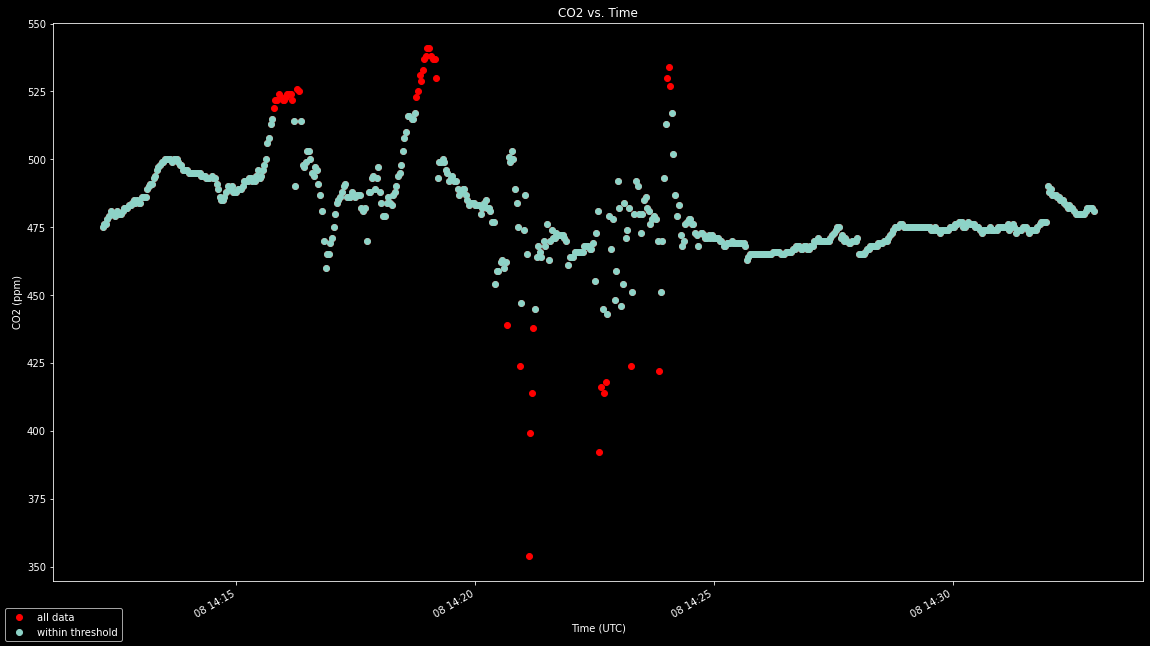

In [13]:
fig, axs = plt.subplots(figsize = (16, 9))
axs.plot(CO2_outside.index, CO2_outside, 'ro', label = 'all data')
axs.plot(CO2_outside_noOutlier.index, CO2_outside_noOutlier, 'o', label = 'within threshold')
axs.set_xlabel('Time (UTC)')
axs.set_ylabel('CO2 (ppm)')
axs.set_title('CO2 vs. Time')
fig.autofmt_xdate()
plt.tight_layout()
fig.legend(loc = 3)

plt.savefig('k30plot_outlier.png', dpi = 300)

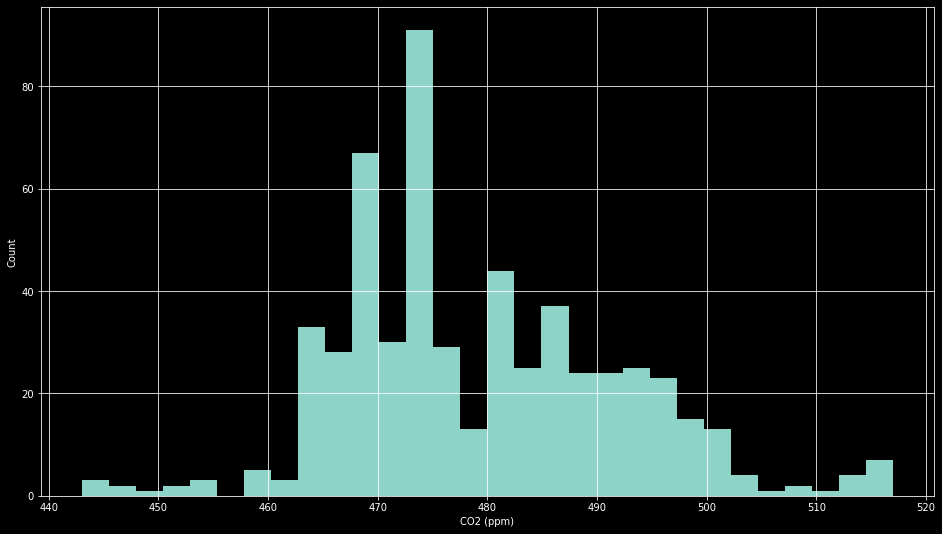

In [14]:
fig, axs = plt.subplots(figsize = (16, 9))
CO2_outside_noOutlier.hist(bins = 30)
axs.set_ylabel('Count')
axs.set_xlabel('CO2 (ppm)')
plt.savefig('k30_hist_postOutlier.png', dpi = 300)